# Principal Component Analysis with Cancer Data

In [ ]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Cancer.csv to Cancer.csv


In [ ]:
df=pd.read_csv("Cancer.csv")

In [ ]:
df.head(5)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
df=df.drop('ID',axis=1)

In [ ]:
df.head(5)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [ ]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [ ]:
df.dtypes

ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

In [ ]:
df.shape

(699, 10)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [ ]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
df.isnull().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [ ]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
filt=(df['Bare Nuclei']=='?')
df.loc[filt]

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
23,8,4,5,1,2,?,7,3,1,4
40,6,6,6,9,6,?,7,8,1,2
139,1,1,1,1,1,?,2,1,1,2
145,1,1,3,1,2,?,2,1,1,2
158,1,1,2,1,3,?,1,1,1,2
164,5,1,1,1,2,?,3,1,1,2
235,3,1,4,1,2,?,3,1,1,2
249,3,1,1,1,2,?,3,1,1,2
275,3,1,3,1,2,?,2,1,1,2
292,8,8,8,1,2,?,6,10,1,4


In [ ]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

df['Bare Nuclei']=df['Bare Nuclei'].replace('?',0)
df['Bare Nuclei']=df['Bare Nuclei'].astype(int)

In [ ]:
val=df['Bare Nuclei'].mean()
df['Bare Nuclei']=df['Bare Nuclei'].replace(0,val)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ClumpThickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.542799,3.601872,1.0,1.0,1.0,5.0,10.0
Normal Nucleoli,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


In [ ]:
df.dtypes

ClumpThickness                   int64
Cell Size                        int64
Cell Shape                       int64
Marginal Adhesion                int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Normal Nucleoli                  int64
Bland Chromatin                  int64
Mitoses                          int64
Class                            int64
dtype: object

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


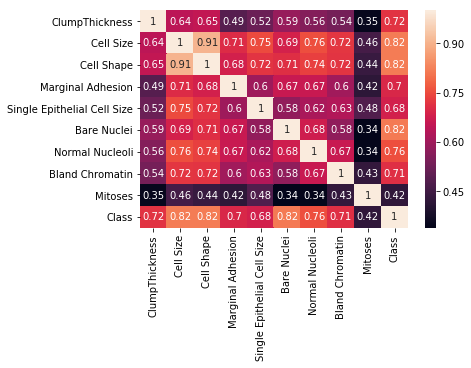

In [ ]:
# Check for correlation of variables
sns.heatmap(df.corr(),annot=True)

In [ ]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

/usr/local/lib/python2.7/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python2.7/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


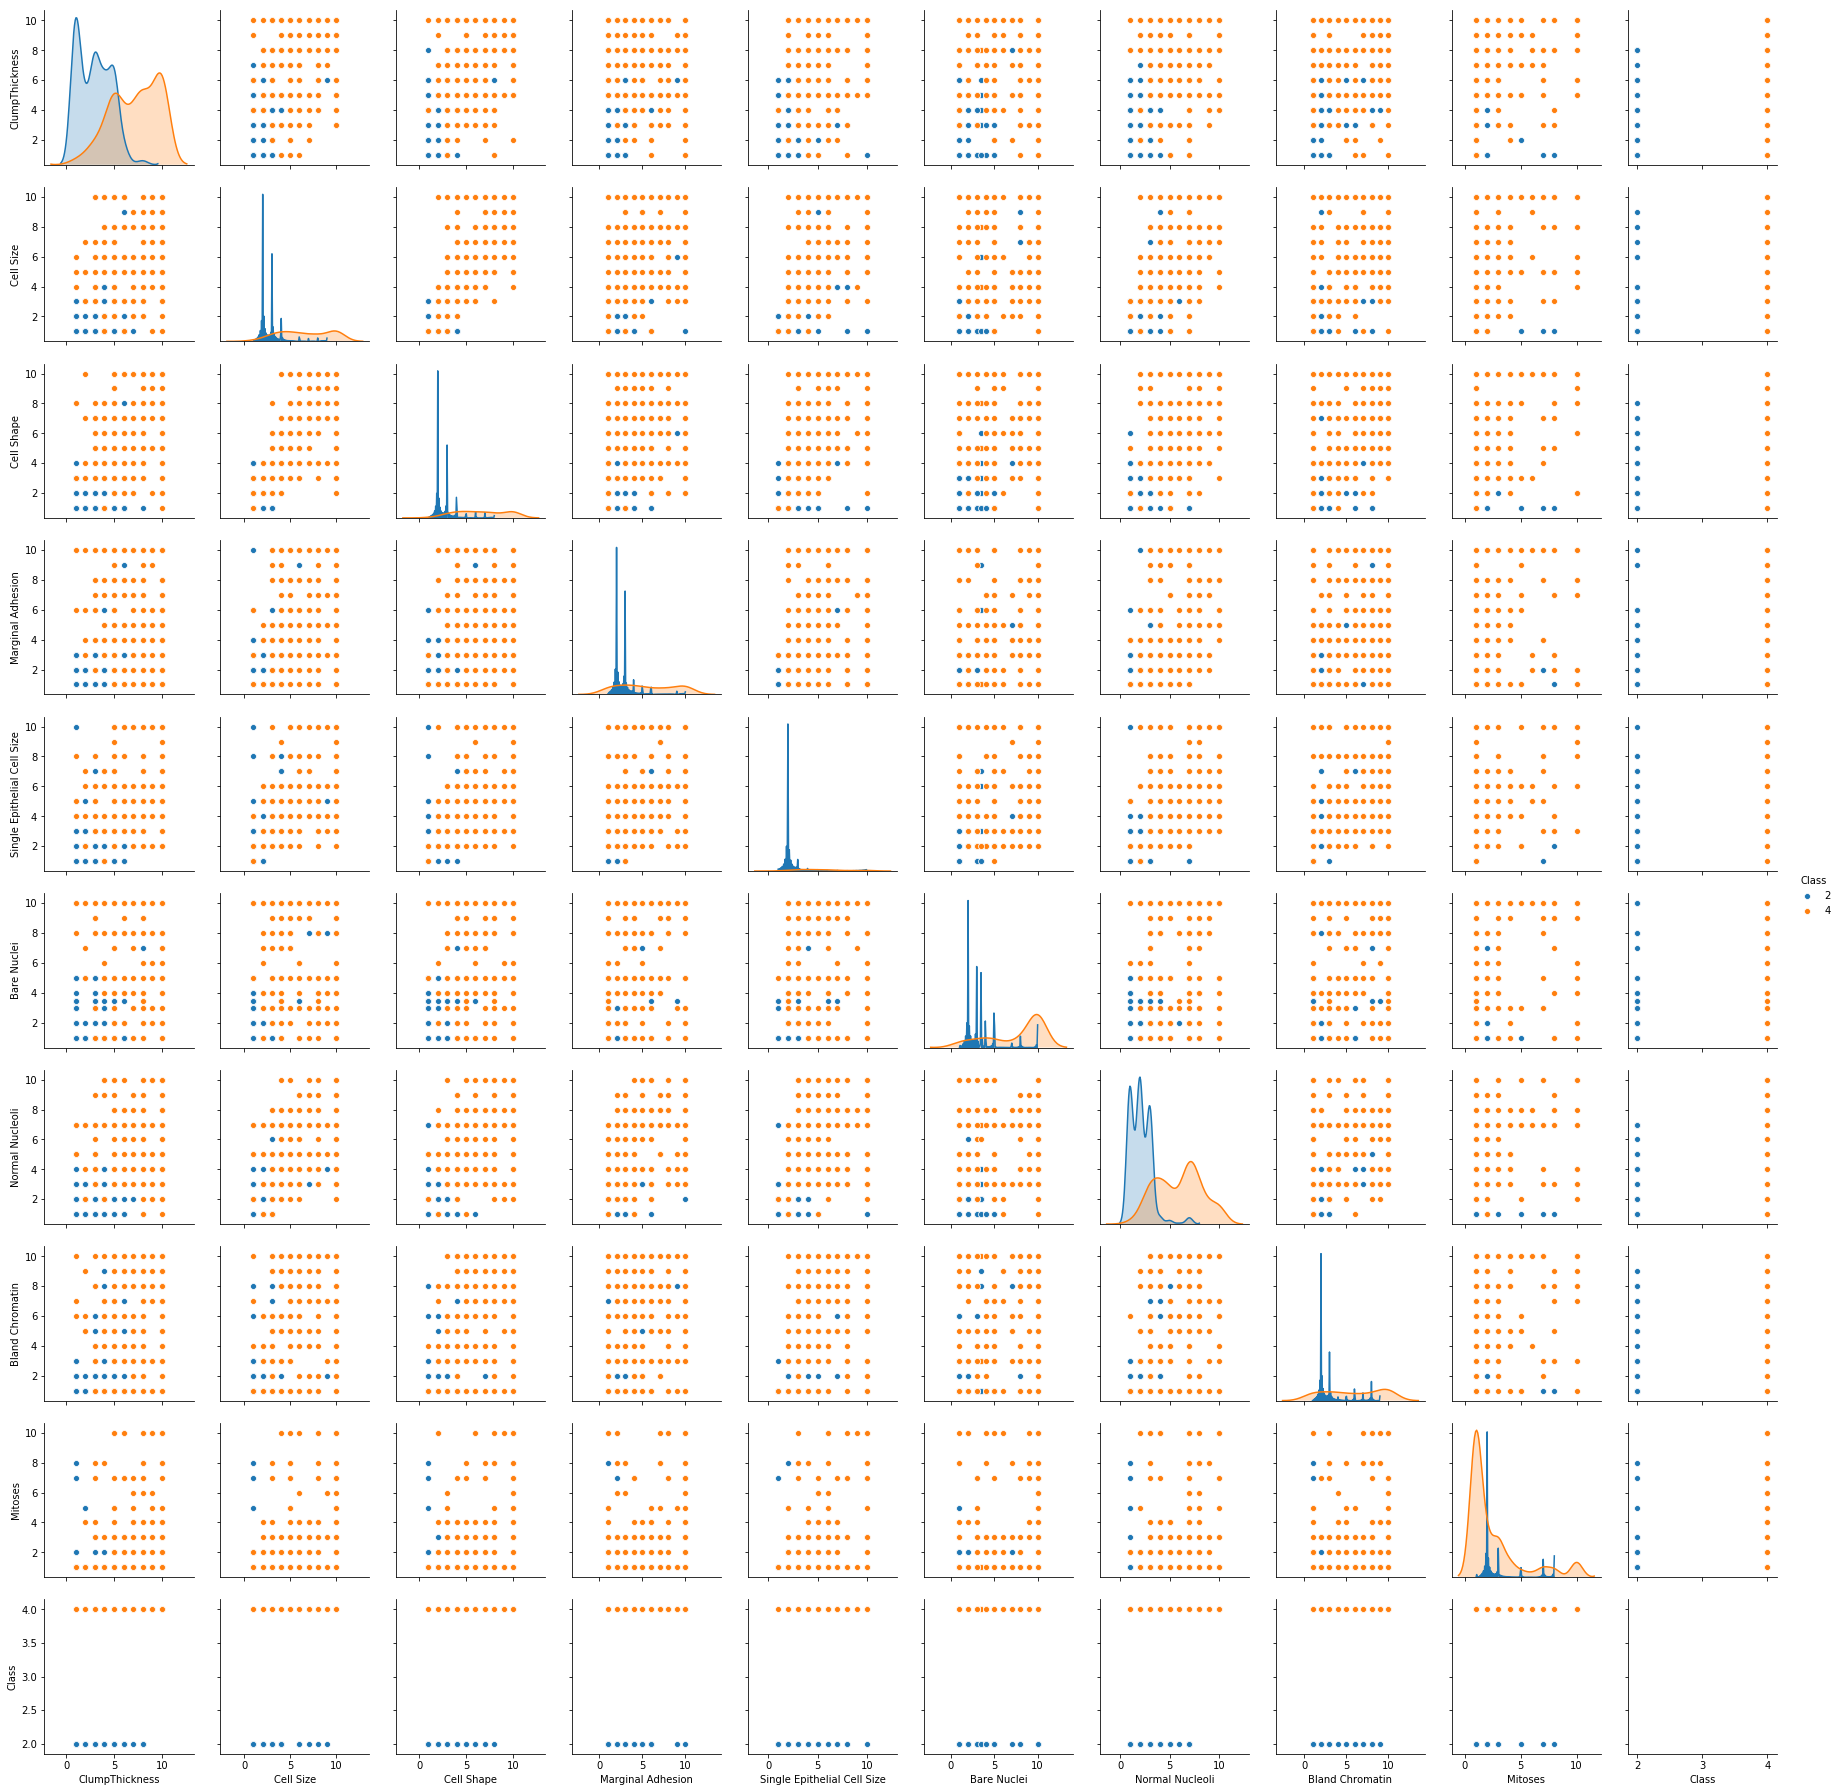

In [ ]:
#Let us check the pair plot
sns.pairplot(df,hue='Class')

In [ ]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [ ]:
# We could see most of the outliers are now removed.

In [ ]:
from scipy import stats


z = np.abs(stats.zscore(df))
print(z)

[[0.20693572 0.69999505 0.74329904 ... 0.61182504 0.34391178 0.72539705]
 [0.20693572 0.28384518 0.2668747  ... 0.28411186 0.34391178 0.72539705]
 [0.50386559 0.69999505 0.74329904 ... 0.61182504 0.34391178 0.72539705]
 ...
 [0.20693572 2.25152563 2.28722218 ... 2.33759359 0.23956962 1.37855538]
 [0.14846494 1.59563215 0.94032386 ... 1.02674087 0.34391178 1.37855538]
 [0.14846494 1.59563215 1.61377302 ... 0.37131451 0.34391178 1.37855538]]


In [ ]:
threshold = 3
print(np.where(z > 3))

(array([ 43,  53,  53,  62,  65,  68,  71,  71,  84,  85,  85,  98,  98,
       100, 104, 104, 105, 113, 117, 122, 129, 149, 149, 163, 167, 173,
       175, 187, 191, 201, 221, 229, 236, 238, 254, 261, 264, 268, 279,
       286, 286, 302, 312, 344, 357, 357, 360, 360, 366, 400, 416, 421,
       425, 482, 482, 506, 608, 612, 648, 648, 680, 689]), array([4, 4, 8, 4, 8, 8, 4, 8, 8, 4, 8, 4, 8, 4, 4, 8, 8, 4, 8, 4, 4, 4,
       8, 8, 8, 8, 4, 8, 4, 4, 4, 4, 8, 8, 4, 4, 4, 8, 8, 4, 8, 8, 4, 4,
       4, 8, 4, 8, 8, 8, 4, 4, 4, 4, 8, 8, 4, 8, 4, 8, 8, 8]))


In [ ]:
df = df[(z < 3).all(axis=1)]

In [ ]:
df.shape

(648, 10)

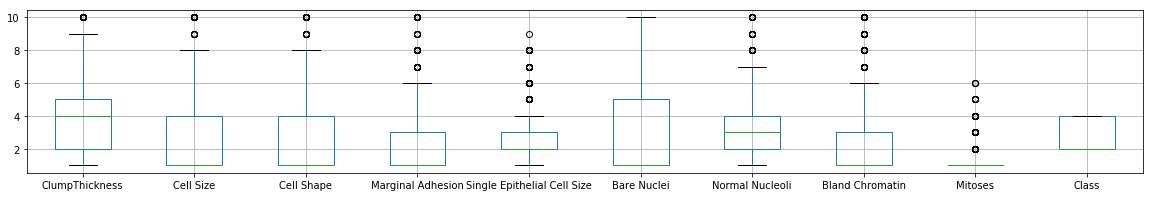

In [ ]:
df.boxplot(figsize=(20,3))

# Q6 Create a covariance matrix for identifying Principal components

In [ ]:
# PCA
# Step 1 - Create covariance matrix


In [ ]:
# data = np.array([A,B,C])

covMatrix = (np.cov(df.T,bias=True))


# Q7 Identify eigen values and eigen vector

# Q8 Find variance and cumulative variance by each eigen vector

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

# Q10 Find correlation between components and features